In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from src.eval import get_run_metrics
from src.utils import read_run_dir, get_model_from_run

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "output/runs"

In [24]:
df = read_run_dir(run_dir)
df 

,run_id,model,n_dims,n_layer,n_head,run_name,noise_types
23,10649225,Transformer-xs,12,3,2,10649225,"[gaussian, laplace]"
18,10649241,Transformer-xs,12,3,2,10649241,"[gaussian, laplace]"
9,10649242,Transformer,12,12,8,10649242,"[gaussian, laplace, exponential]"
33,10649243,Transformer-xs,12,3,2,10649243,"[gaussian, laplace]"
34,10649244,Transformer-small,12,6,4,10649244,[gaussian]
2,10649245,Transformer,12,12,8,10649245,[gaussian]
17,10649246,Transformer-xs,12,3,2,10649246,"[gaussian, laplace]"
47,10649247,Transformer,12,12,8,10649247,"[gaussian, laplace, exponential]"
10,10649248,Transformer-small,12,6,4,10649248,[gaussian]
32,10649249,Transformer-small,12,6,4,10649249,"[gaussian, laplace]"


In [14]:
run_id = "guiling_basirostral"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, run_id)
recompute_metrics = False

metrics = get_run_metrics(run_path)

100%|██████████| 2/2 [00:00<00:00, 29537.35it/s]


In [15]:
from copy import deepcopy
def plot_mse_coverage(metrics, start_point):
    metrics = deepcopy(metrics)
    palette = sns.color_palette("colorblind")
    import numpy as np
    
    fig, axes = plt.subplots(2, 1)
    color=0
    for name, vs in metrics.items():
      for k, v in vs.items():
          vs[k] = np.array(v[start_point:])

      axes[0].plot(vs['mse'], label=name, color=palette[color % 10], lw=2)
      low, high = vs['mse'] - vs['error_std'], vs['mse'] + vs['error_std']
      axes[0].fill_between(range(len(vs['mse'])), low, high, alpha=0.3)
      axes[0].set_ylabel('MSE')

      axes[1].plot(vs['coverage'], label=name, color=palette[color % 10], lw=2)
      axes[1].set_ylabel('Coverage')
      # legend0 = axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))
      # legend1 = axes[1].legend(loc="upper left", bbox_to_anchor=(1, 1))
    
      color += 1
    # fig.set_size_inches(4, 3)

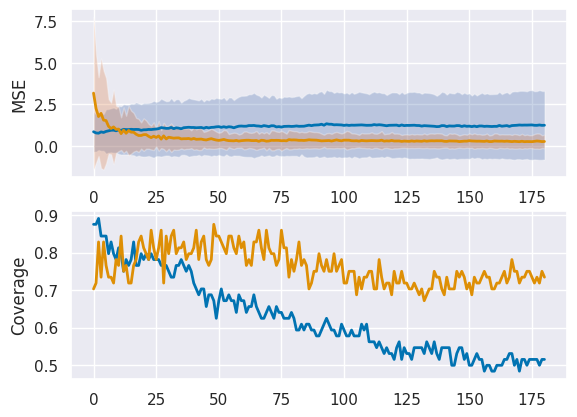

In [17]:
plot_mse_coverage(metrics, 20)

# Interactive 

In [1]:
from src.samplers import get_scm_sampler

In [12]:
from src.configs import SCMConfig
conf = SCMConfig(scm_type="linear", noise_types=["gaussian"], x_dim=10, t_dim=1, y_dim=1, conf_factor=2)
scm_sampler = get_scm_sampler(conf)

In [16]:
from src.baselines import LinearDML
from src.eval import eval_model
dml = LinearDML()

results = eval_model(dml, conf, n_points=200, batch_size=16, num_eval_examples=16)

In [21]:
# results['mse']

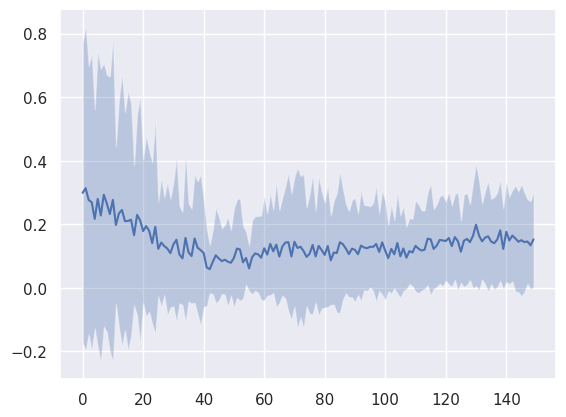

In [20]:
fig, ax = plt.subplots(1, 1)
start_point = 50
metrics = {}
for k, v in results.items():
    metrics[k] = v[start_point:]

ax.plot(metrics['mse'])
low, high = metrics['mse'] - metrics['error_std'], metrics['mse'] + metrics['error_std']
ax.fill_between(range(len(metrics['mse'])), low, high, alpha=0.3)

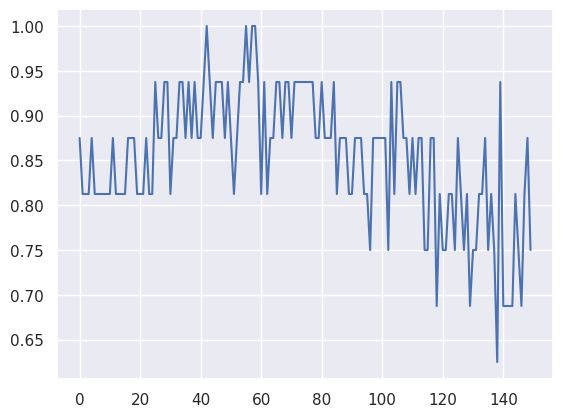

In [23]:
fig, ax = plt.subplots(1, 1)
start_point = 50
metrics = {}
for k, v in results.items():
    metrics[k] = v[start_point:]

ax.plot(metrics['coverage'])
# low, high = metrics['coverage'] - metrics['coverage_std'], metrics['coverage'] + metrics['coverage_std']
# ax.fill_between(rang(len(metrics['coverage'])), low, high, alpha=0.3)